In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Clustering/C01_anime.csv')
data.head()

,title,mediaType,eps,duration,watched,rating,votes
0,your name.,Movie,1.0,107.0,58831.0,4.663,43960.0
1,A Silent Voice,Movie,1.0,130.0,45892.0,4.661,33752.0
2,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Movie,1.0,111.0,8454.0,4.625,6254.0
3,Spirited Away,Movie,1.0,125.0,115949.0,4.588,82752.0
4,Wolf Children,Movie,1.0,117.0,35896.0,4.578,26465.0


In [3]:
data = data.drop(['title', 'mediaType', 'eps', 'duration', 'votes'], axis=1)
data.head()

,watched,rating
0,58831.0,4.663
1,45892.0,4.661
2,8454.0,4.625
3,115949.0,4.588
4,35896.0,4.578


Text(0.5, 0, 'watched')

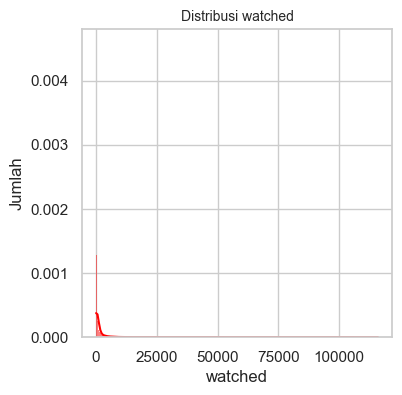

In [4]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['watched'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi watched', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('watched')

Text(0.5, 0, 'rating')

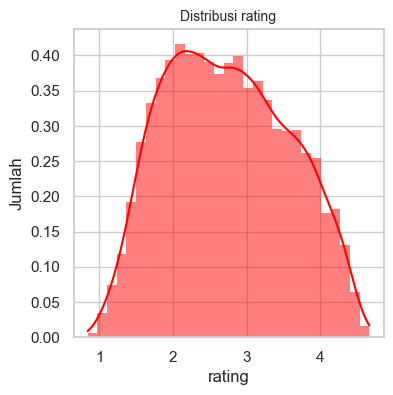

In [5]:
plt.figure(figsize=(4,4))
sns.set(style= 'whitegrid')
sns.histplot(data['rating'], color='red', kde=True, stat='density', linewidth=0)
plt.title('Distribusi rating', fontsize=10)
plt.ylabel('Jumlah')
plt.xlabel('rating')

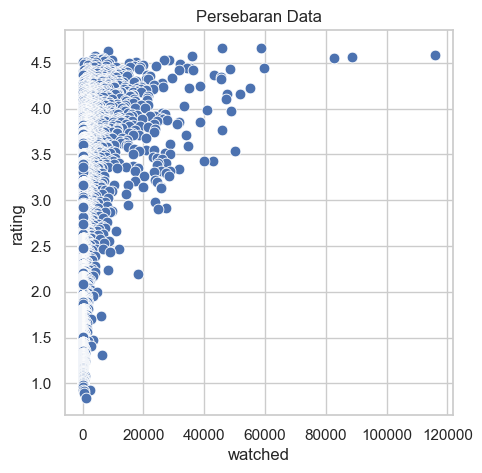

In [6]:
# Persebaran Data
plt.figure(figsize=(5,5))
sns.scatterplot(x='watched', y='rating', data = data, s = 60)
plt.title('Persebaran Data')
plt.show()

In [7]:
# hitung within cluster sum of squared error (WCSS) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters=i, n_init=10)
    kmModel.fit(data)
    wcss.append(kmModel.inertia_)

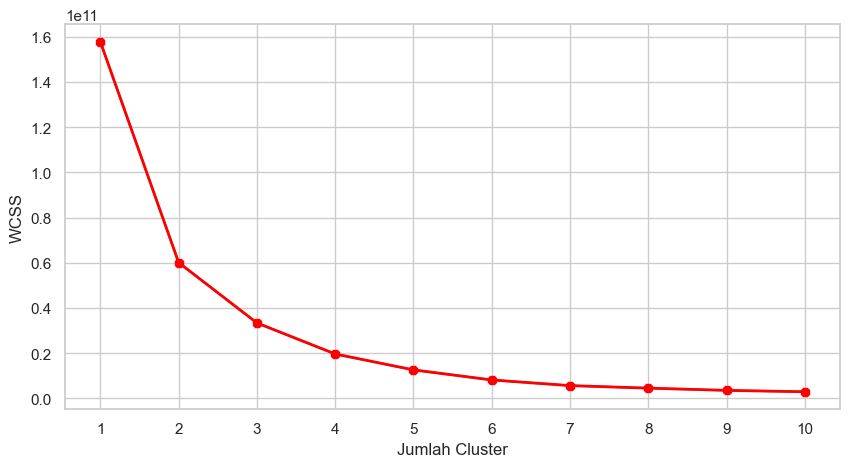

In [8]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [9]:
# model dengan 2 cluster
kmModelFix = KMeans(n_clusters=2, n_init=10)
kmModelFix.fit(data)

# memprediksi label
hasil_prediksi = kmModelFix.predict(data)
print(hasil_prediksi)

[1 1 0 ... 0 0 0]


In [10]:
data['label'] = hasil_prediksi
data.head()

,watched,rating,label
0,58831.0,4.663,1
1,45892.0,4.661,1
2,8454.0,4.625,0
3,115949.0,4.588,1
4,35896.0,4.578,1


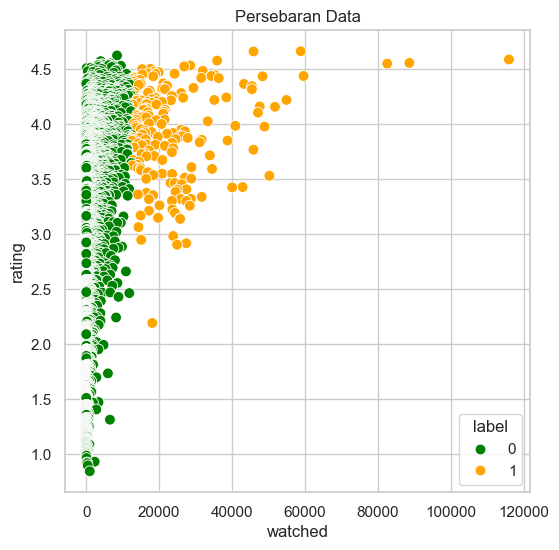

In [11]:
# Persebaran Data beserta labelnya
plt.figure(figsize=(6,6))
sns.scatterplot(x='watched', y='rating', hue='label',
                palette=['green', 'orange'], legend='full',
                data = data, s = 60)
plt.title('Persebaran Data')
plt.show()